### <u> Import necessary libraries </u>

In [1]:
import pandas as pd
import numpy as np

### <u> Loading a dataset </u>

In [4]:
df = pd.read_csv('train.csv')
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [6]:
# Renaming columns
df.rename(columns={'Class/ASD': 'Class_ASD'}, inplace=True)

In [8]:
df.rename(columns={'austim': 'autism'}, inplace=True)

In [10]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [12]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  autism           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

### <u> Handling Missing Values </u>

In [15]:
df[df == '?'] = np.nan
df.isna().any() 

ID                 False
A1_Score           False
A2_Score           False
A3_Score           False
A4_Score           False
A5_Score           False
A6_Score           False
A7_Score           False
A8_Score           False
A9_Score           False
A10_Score          False
age                False
gender             False
ethnicity           True
jaundice           False
autism             False
contry_of_res      False
used_app_before    False
result             False
age_desc           False
relation            True
Class_ASD          False
dtype: bool

In [17]:
df.isnull().sum()

ID                   0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity          151
jaundice             0
autism               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation            77
Class_ASD            0
dtype: int64

In [19]:
df['ethnicity'] = df['ethnicity'].fillna(df['ethnicity'].mode()[0])
df['relation'] = df['relation'].fillna(df['relation'].mode()[0])

In [21]:
df.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
autism             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class_ASD          0
dtype: int64

In [23]:
df.duplicated().sum()

0

### <u> Check Unique Values of Categorical Variables </u>

In [26]:
print(df.ethnicity.unique())

['White-European' 'South Asian' 'Black' 'Asian' 'Middle Eastern ' 'others'
 'Latino' 'Turkish' 'Others' 'Hispanic' 'Pasifika']


In [28]:
print(df.gender.unique())

['f' 'm']


In [30]:
print(df.jaundice.unique())

['no' 'yes']


In [32]:
print(df.autism.unique())

['no' 'yes']


In [34]:
print(df.contry_of_res.unique())

['United States' 'Australia' 'United Kingdom' 'New Zealand' 'Italy'
 'Nicaragua' 'Canada' 'United Arab Emirates' 'Netherlands' 'Sri Lanka'
 'India' 'Armenia' 'Sierra Leone' 'Argentina' 'Azerbaijan' 'Iceland'
 'Egypt' 'Serbia' 'Afghanistan' 'Costa Rica' 'Jordan' 'Angola' 'Pakistan'
 'Brazil' 'Ireland' 'Kazakhstan' 'Viet Nam' 'Ethiopia' 'Austria' 'Finland'
 'France' 'Malaysia' 'Japan' 'Spain' 'Philippines' 'Iran' 'Czech Republic'
 'Russia' 'Romania' 'Mexico' 'Belgium' 'Aruba' 'Uruguay' 'Indonesia'
 'Ukraine' 'AmericanSamoa' 'Germany' 'China' 'Iraq' 'Tonga' 'South Africa'
 'Saudi Arabia' 'Hong Kong' 'Bahamas' 'Ecuador' 'Cyprus' 'Bangladesh'
 'Oman' 'Bolivia' 'Sweden' 'Niger']


In [36]:
print(df.used_app_before.unique())

['no' 'yes']


In [38]:
print(df.age_desc.unique())

['18 and more']


In [40]:
print(df.relation.unique())

['Self' 'Health care professional' 'Parent' 'Relative' 'Others']


In [42]:
print(df.Class_ASD.unique())

[0 1]


### <u> Rename the some mistake unique values </u>

In [45]:
df['ethnicity']=df['ethnicity'].replace('others', 'Others')

In [47]:
print(df.ethnicity.unique())

['White-European' 'South Asian' 'Black' 'Asian' 'Middle Eastern ' 'Others'
 'Latino' 'Turkish' 'Hispanic' 'Pasifika']


### <u> Data Vizualization </u>

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Percentage of individuals with ASD by ethnicity

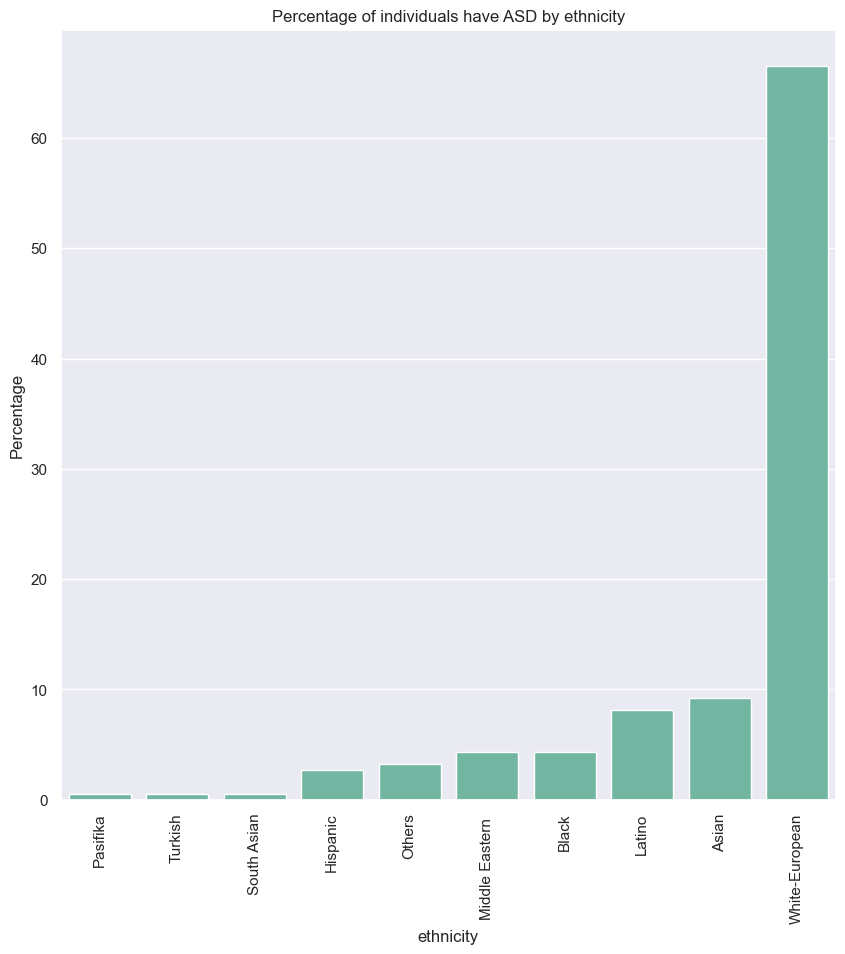

In [52]:
df_asd = df[df['Class_ASD'] == 1]
total_samples = len(df_asd)
percentage_df = df_asd['ethnicity'].value_counts(normalize=True).reset_index()
percentage_df.columns = ['ethnicity', 'percentage']
percentage_df['percentage'] = percentage_df['percentage'] * 100
percentage_df = percentage_df.sort_values('percentage')

sns.set_theme(style="darkgrid",palette="Set2")

plt.figure(figsize=(10, 10))
sns.barplot(x='ethnicity', y='percentage', data=percentage_df, order=percentage_df['ethnicity'])
plt.ylabel('Percentage')
plt.title('Percentage of individuals have ASD by ethnicity')
plt.xticks(rotation=90)
plt.show()

##### Percentage of individuals with ASD by contry_of_res

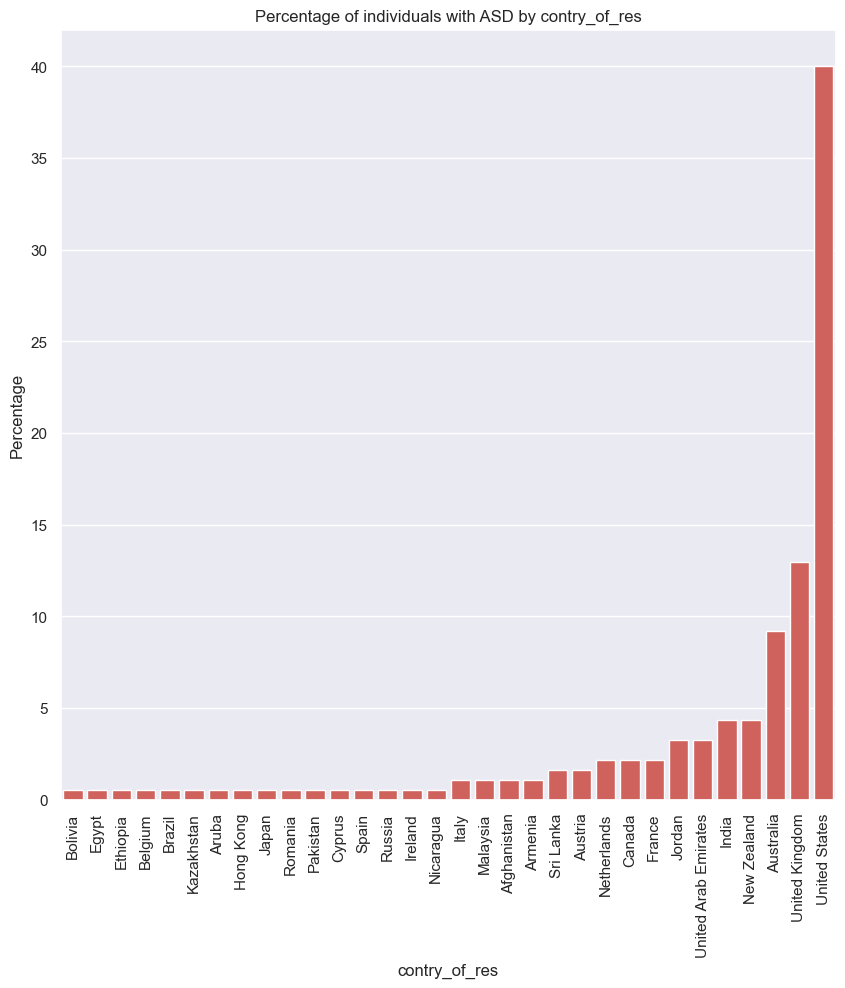

In [56]:
df_asd = df[df['Class_ASD'] == 1]
total_samples = len(df_asd)
percentage_df = df_asd['contry_of_res'].value_counts(normalize=True).reset_index()
percentage_df.columns = ['contry_of_res', 'percentage']
percentage_df['percentage'] = percentage_df['percentage'] * 100
percentage_df = percentage_df.sort_values('percentage')

sns.set_theme(style="darkgrid", palette="Spectral")

plt.figure(figsize=(10, 10))
sns.barplot(x='contry_of_res', y='percentage', data=percentage_df, order=percentage_df['contry_of_res'])
plt.ylabel('Percentage')
plt.title('Percentage of individuals with ASD by contry_of_res')
plt.xticks(rotation=90);
plt.show()

## Count of the Gender by Class_AS

Text(0.5, 1.0, ' Counnts of Autism Cases by Gender')

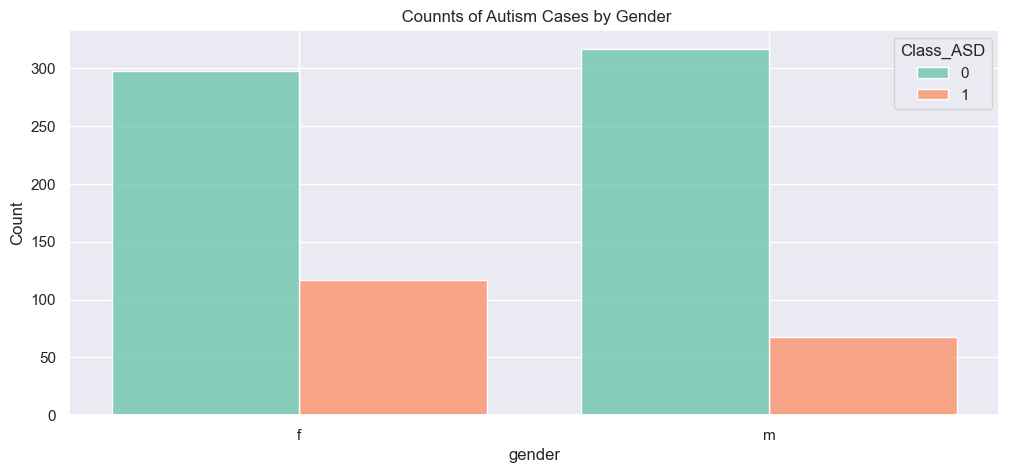

In [59]:
plt.figure(figsize=(12,5))
sns.histplot(data=df, x="gender", hue="Class_ASD", multiple="dodge", palette ='Set2',shrink=.8)
plt.title(' Counnts of Autism Cases by Gender')

## Density Plot for Class_ASD

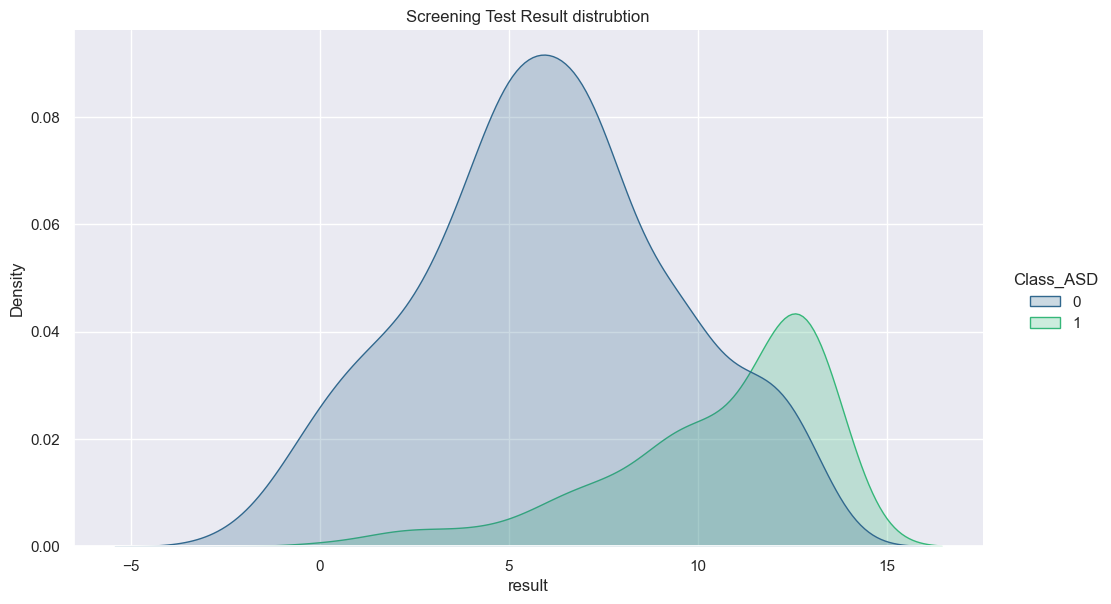

In [62]:
sns.displot(data=df,x='result',hue="Class_ASD" ,kind="kde", palette ="viridis" ,fill=True,height=6, aspect=1.7) ;
plt.title("Screening Test Result distrubtion")
plt.show()

## Histograms For Age Distribution with Class_ASD

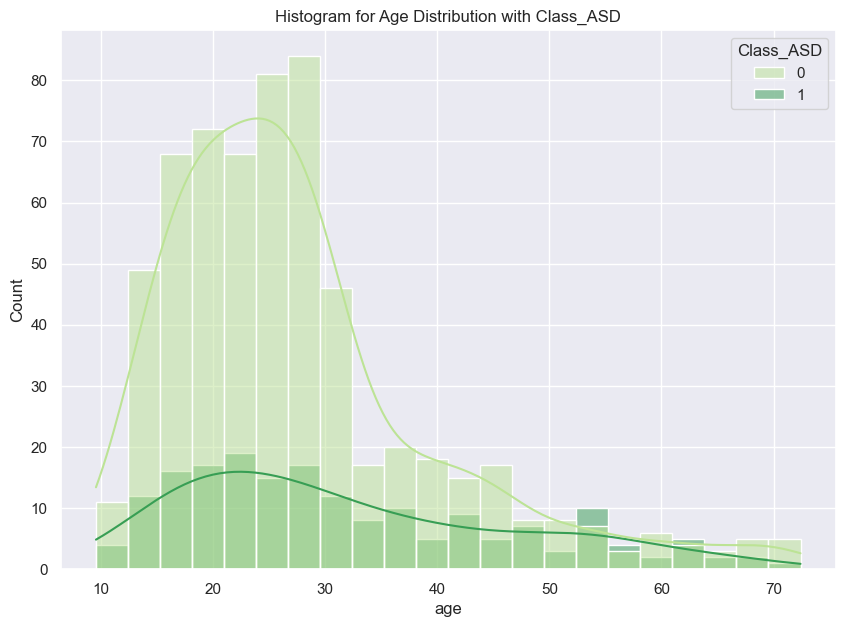

In [65]:
plt.figure(figsize=(10, 7))
age_plot = df.groupby(['age', 'Class_ASD']).size().reset_index(name="size")
sns.histplot(data=age_plot, x='age', hue="Class_ASD", kde=True, palette='YlGn')
plt.title("Histogram for Age Distribution with Class_ASD")
plt.show()

#### Define the correlation between numerical variables and the Class_ASD

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  autism           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [70]:
# pip install seaborn --upgrade

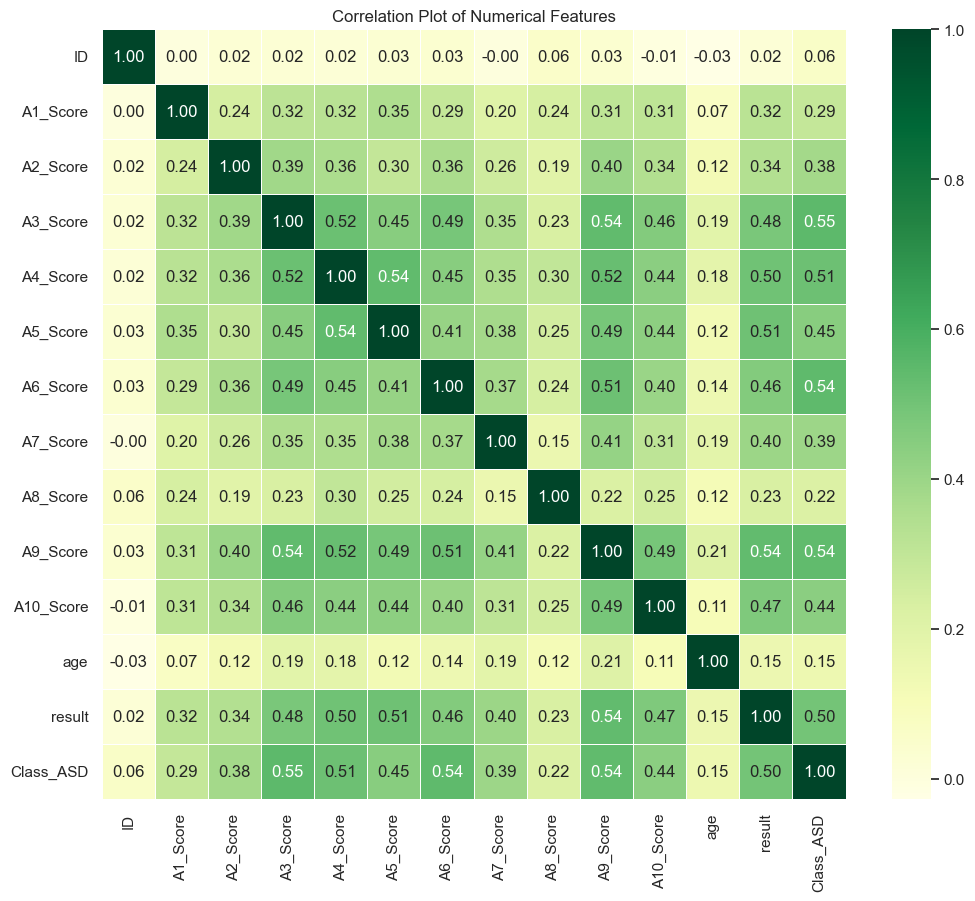

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

numerical_columns = df.select_dtypes(include=['int64', 'float64'])
# Create a correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="YlGn", fmt=".2f", linewidths=.5)

# Show the plot
plt.title("Correlation Plot of Numerical Features")
plt.show()


##### Here: A1_Score, A8_Score, age variables have very less correlation between Classs_ASD (<0.4). Then there are not significant affect to the Class_ASD

#### Define the correlation between categorical variables and the Class_ASD

In [76]:
import pandas as pd
import scipy.stats as stats

# Selecting categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Results dictionary to store p-values of Chi-Square tests
chi_square_results = {}

for column in categorical_columns:
    if column != 'Class_ASD':
        contingency_table = pd.crosstab(df[column], df['Class_ASD'])
        chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
        chi_square_results[column] = p

# Convert results to a DataFrame for better readability
chi_square_results_df = pd.DataFrame(list(chi_square_results.items()), columns=['Feature', 'p-value'])

print("Chi-Square Test Results:")
print(chi_square_results_df)

Chi-Square Test Results:
           Feature       p-value
0           gender  5.696647e-04
1        ethnicity  1.510274e-10
2         jaundice  1.169010e-07
3           autism  5.258030e-26
4    contry_of_res  1.346083e-09
5  used_app_before  8.076826e-01
6         age_desc  1.000000e+00
7         relation  8.661287e-02


##### Here: used_app_before, age_desc, relation variables are not significant 

### <u> Identify Shape of the Dataset </u>

In [80]:
# Get the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 800
Number of columns: 22


In [82]:
df['Class_ASD'].value_counts() 

Class_ASD
0    615
1    185
Name: count, dtype: int64

### <u> Split a Dataset </u>

In [85]:
# Split into training and testing
from sklearn.model_selection import train_test_split
X=df.drop(columns=['ID','Class_ASD', 'A1_Score', 'A8_Score', 'age', 'used_app_before', 'age_desc', 'relation' ])
y=df['Class_ASD']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [86]:
# Check the splits are correct
print(f"Train size: {round(len(X_train) / len(X) * 100)}% \n\
Test size: {round(len(X_test) / len(X) * 100)}%")

Train size: 70% 
Test size: 30%


In [89]:
print("Counts of label in y_train '1': {}".format(sum(y_train == 1))) 
print("Counts of label in y_train '0': {} \n".format(sum(y_train == 0))) 

Counts of label in y_train '1': 134
Counts of label in y_train '0': 426 



### Create a Pipeline for Preproceser, SMOTE and Classifier

In [92]:
from imblearn.over_sampling import SMOTE 

In [93]:
# ! pip install imblearn 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

In [94]:
#transforming
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [98]:
numeric_features=[ 'result']
categorical_features = ['gender', 'ethnicity', 'jaundice', 'autism', 'contry_of_res']
preprocessor = ColumnTransformer( transformers=[('numeric', numeric_transformer, numeric_features) , ('categorical', categorical_transformer, categorical_features)])


#### Logistic Regression 

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [103]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('smote',SMOTE(random_state=42)),('classifier', LogisticRegression())])

param_grid={
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    }

In [105]:
from sklearn.model_selection import StratifiedKFold

In [107]:
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [109]:
clf=GridSearchCV(pipeline,param_grid,cv=SKF,n_jobs=5,verbose=1)

In [111]:
model=clf.fit(X_train,y_train)
print(model)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['result']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                      

In [113]:
print(len(X_train))

560


In [115]:
print(len(y_train))

560


In [117]:
print(clf.best_params_)

{'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [119]:
best_model = clf.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ethnicity',
                                                   'jaundice', 'autism',
                                                   'contry_of_res'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression(C=0.1, solver='liblinear'))])

In [121]:
from sklearn.metrics import accuracy_score
preds_lr = best_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, preds_lr))

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, preds_lr))

Accuracy Score: 0.7833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85       189
           1       0.49      0.76      0.60        51

    accuracy                           0.78       240
   macro avg       0.71      0.78      0.73       240
weighted avg       0.83      0.78      0.80       240



In [123]:
from sklearn.metrics import r2_score

In [125]:
print (r2_score(y_test, preds_lr))

-0.2947401182695304


In [127]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score

In [129]:
# Print precision score
precision = precision_score(y_test, preds_lr)
print("Precision Score:", precision)

Precision Score: 0.4936708860759494


Confusion Matrix:
 [[149  40]
 [ 12  39]]


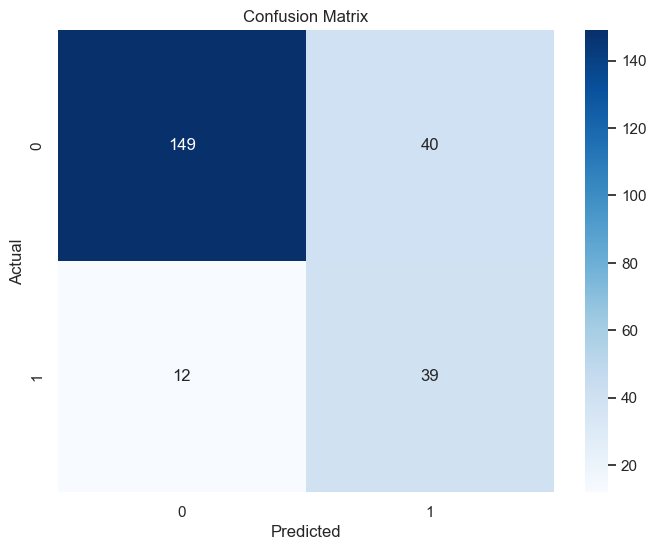

In [131]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, preds_lr)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

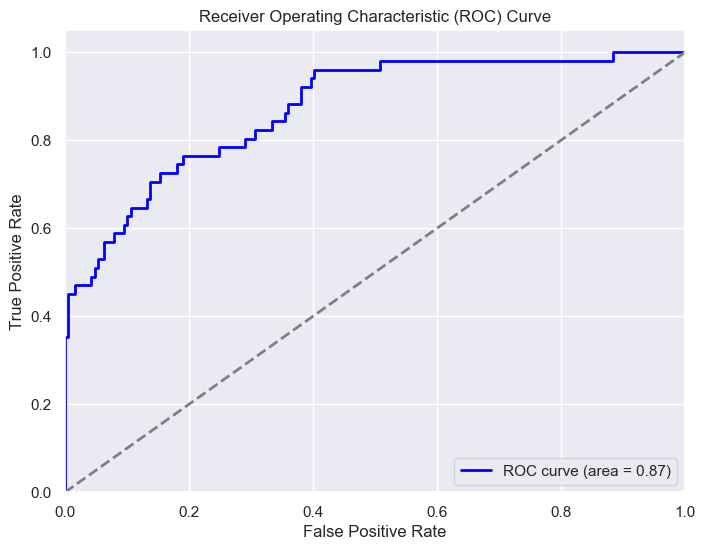

In [133]:
# Compute ROC curve and ROC area
y_proba_lr = best_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Support Vector Classifier

In [136]:
from sklearn.svm import SVC

In [138]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('smote',SMOTE(random_state=42)),('classifier', SVC(probability=True))])
param_grid={
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale','auto']
    }

In [140]:
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [142]:
clf=GridSearchCV(pipeline,param_grid,cv=SKF,n_jobs=5,verbose=1)

In [144]:
model=clf.fit(X_train,y_train)
print(model)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['result']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                     

In [146]:
print(clf.best_params_)

{'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}


In [148]:
best_model = clf.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ethnicity',
                                                   'jaundice', 'autism',
                                                   'contry_of_res'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', SVC(C=1, probability=True))])

In [150]:
preds_svc = best_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, preds_svc))

print("Classification Report:\n", classification_report(y_test, preds_svc))

Accuracy Score: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86       189
           1       0.52      0.76      0.62        51

    accuracy                           0.80       240
   macro avg       0.72      0.79      0.74       240
weighted avg       0.84      0.80      0.81       240



In [152]:
from sklearn.metrics import r2_score

In [154]:
print (r2_score(y_test, preds_svc))

-0.19514472455648968


In [156]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score

In [158]:
# Print precision score
precision = precision_score(y_test, preds_svc)
print("Precision Score:", precision)

Precision Score: 0.52


Confusion Matrix:
 [[153  36]
 [ 12  39]]


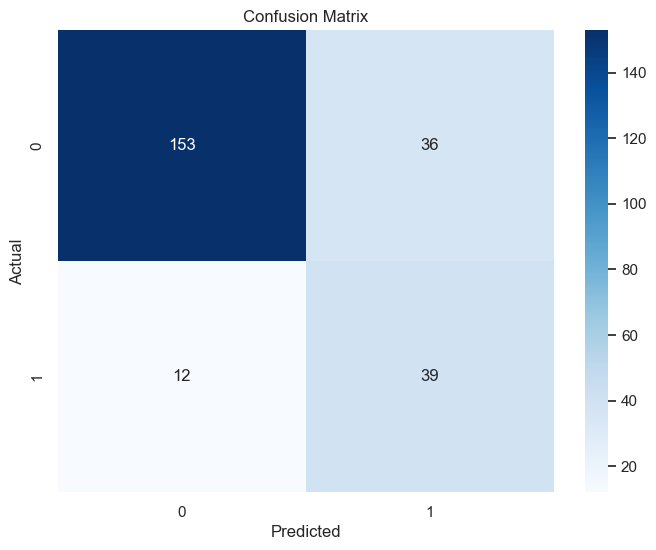

In [160]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, preds_svc)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

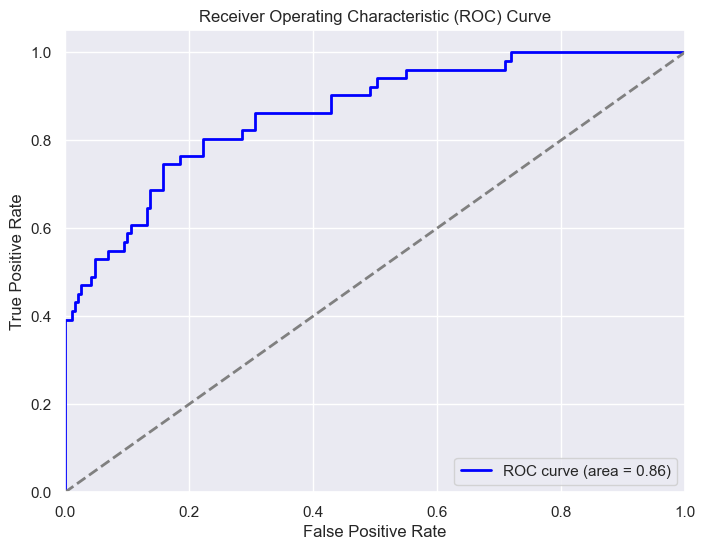

In [162]:
# Compute ROC curve and ROC area
y_proba_svc = best_model.predict_proba(X_test)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Random Forest Classifier

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('smote',SMOTE(random_state=42)),('classifier', RandomForestClassifier())])

In [169]:
param_grid = {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
        'classifier__bootstrap': [True, False]
    }

In [171]:
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [173]:
clf=GridSearchCV(pipeline,param_grid,cv=SKF,n_jobs=5,verbose=1)

In [175]:
model=clf.fit(X_train,y_train)
print(model)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['result']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                    

In [177]:
print(clf.best_params_)

{'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


In [179]:
best_model = clf.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ethnicity',
                                                   'jaundice', 'autism',
                                                   'contry_of_res'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        n_estimators=50))])

In [181]:
preds_rf = best_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, preds_rf))

print("Classification Report:\n", classification_report(y_test, preds_rf))

Accuracy Score: 0.8416666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       189
           1       0.62      0.65      0.63        51

    accuracy                           0.84       240
   macro avg       0.76      0.77      0.77       240
weighted avg       0.84      0.84      0.84       240



In [183]:
from sklearn.metrics import r2_score

In [185]:
print (r2_score(y_test, preds_rf))

0.05384375972611233


In [187]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score

In [189]:
# Print precision score
precision = precision_score(y_test, preds_rf)
print("Precision Score:", precision)

Precision Score: 0.6226415094339622


Confusion Matrix:
 [[169  20]
 [ 18  33]]


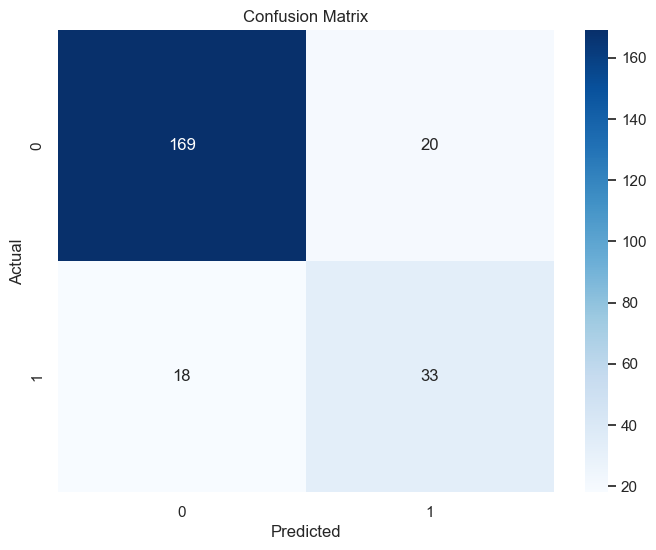

In [191]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, preds_rf)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

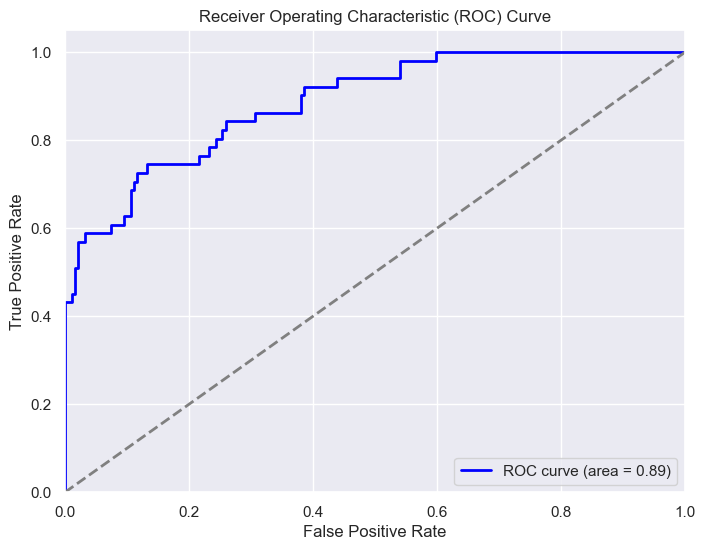

In [193]:
# Compute ROC curve and ROC area
y_proba_rf = best_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Lightgbm

In [196]:
# !pip install lightgbm

In [198]:
import lightgbm as lgb

In [199]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('smote',SMOTE(random_state=42)),('classifier', lgb.LGBMClassifier())])

In [200]:
param_grid = {'classifier__n_estimators': [50, 150, 200],
        'classifier__max_depth': [4, 6, 8],
        'classifier__learning_rate': [0.025, 0.05, 0.075, 0.1]}

In [201]:
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [202]:
clf=GridSearchCV(pipeline,param_grid,cv=SKF,n_jobs=5, verbose=20)

In [203]:
model=clf.fit(X_train,y_train)
print(model)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Number of positive: 426, number of negative: 426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 852, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [210]:
print(clf.best_params_)

{'classifier__learning_rate': 0.025, 'classifier__max_depth': 6, 'classifier__n_estimators': 150}


In [212]:
best_model = clf.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ethnicity',
                                                   'jaundice', 'autism',
                                                   'contry_of_res'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LGBMClassifier(learning_rate=0.025, max_depth=6,
                                n_estimators=150))])

In [214]:
preds_lgb = best_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, preds_lgb))

print("Classification Report:\n", classification_report(y_test, preds_lgb))

Accuracy Score: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       189
           1       0.53      0.61      0.56        51

    accuracy                           0.80       240
   macro avg       0.71      0.73      0.72       240
weighted avg       0.81      0.80      0.81       240



In [216]:
from sklearn.metrics import r2_score

In [218]:
print (r2_score(y_test, preds_lgb))

-0.19514472455648968


In [220]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score

In [222]:
# Print precision score
precision = precision_score(y_test, preds_lgb)
print("Precision Score:", precision)

Precision Score: 0.5254237288135594


Confusion Matrix:
 [[161  28]
 [ 20  31]]


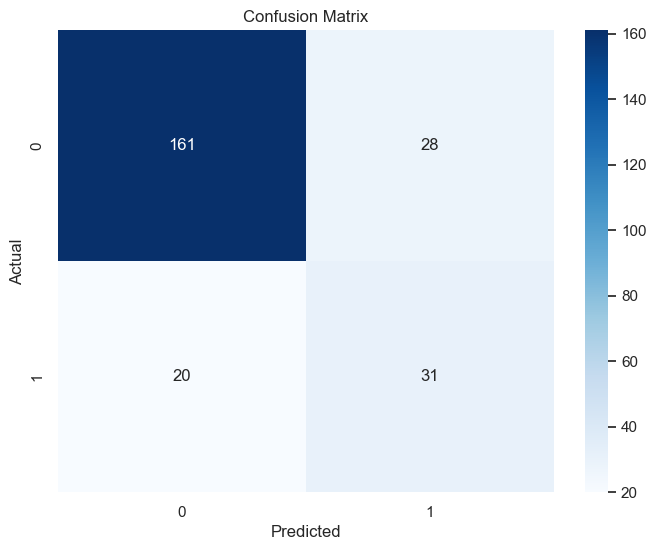

In [224]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, preds_lgb)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

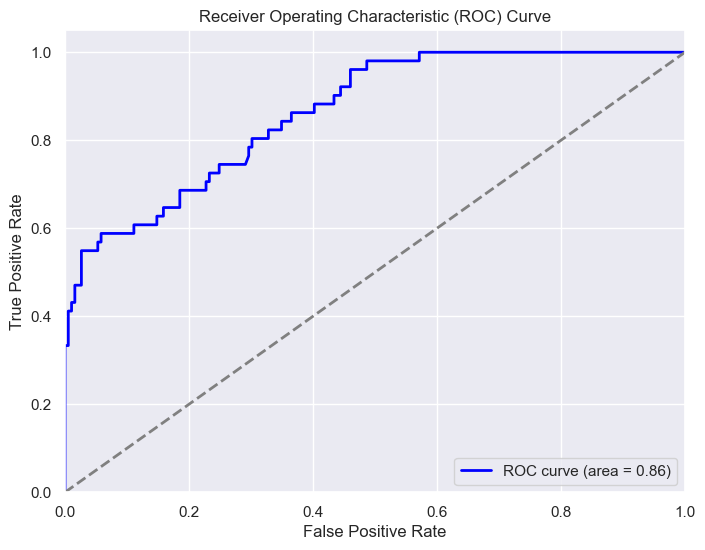

In [226]:
# Compute ROC curve and ROC area
y_proba_lgb = best_model.predict_proba(X_test)[:, 1]
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_proba_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lgb)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### KNeighborsClassifier

In [229]:
from sklearn.neighbors import KNeighborsClassifier

In [231]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('smote',SMOTE(random_state=42)),('classifier', KNeighborsClassifier())])

In [233]:
param_grid={
        'classifier':[KNeighborsClassifier()],
        'classifier__n_neighbors':[3,5,7,9,11,13],
        'classifier__weights':['uniform', 'distance'],
        'classifier__p': [1,2]
    
    }

In [235]:
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [237]:
clf=GridSearchCV(pipeline,param_grid,cv=SKF,n_jobs=5,verbose=1)

In [239]:
model=clf.fit(X_train,y_train)
print(model)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['result']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                    

In [241]:
print(clf.best_params_)

{'classifier': KNeighborsClassifier(n_neighbors=11, p=1), 'classifier__n_neighbors': 11, 'classifier__p': 1, 'classifier__weights': 'uniform'}


In [243]:
best_model = clf.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ethnicity',
                                                   'jaundice', 'autism',
                                                   'contry_of_res'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', KNeighborsClassifier(n_neighbors=11, p=1))])

In [245]:
preds_kn = best_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, preds_kn))

print("Classification Report:\n", classification_report(y_test, preds_kn))

Accuracy Score: 0.8708333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       189
           1       0.75      0.59      0.66        51

    accuracy                           0.87       240
   macro avg       0.82      0.77      0.79       240
weighted avg       0.86      0.87      0.86       240



In [247]:
print (r2_score(y_test, preds_kn))

0.2281356987239338


In [249]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score

In [251]:
# Print precision score
precision = precision_score(y_test, preds_kn)
print("Precision Score:", precision)

Precision Score: 0.75


Confusion Matrix:
 [[179  10]
 [ 21  30]]


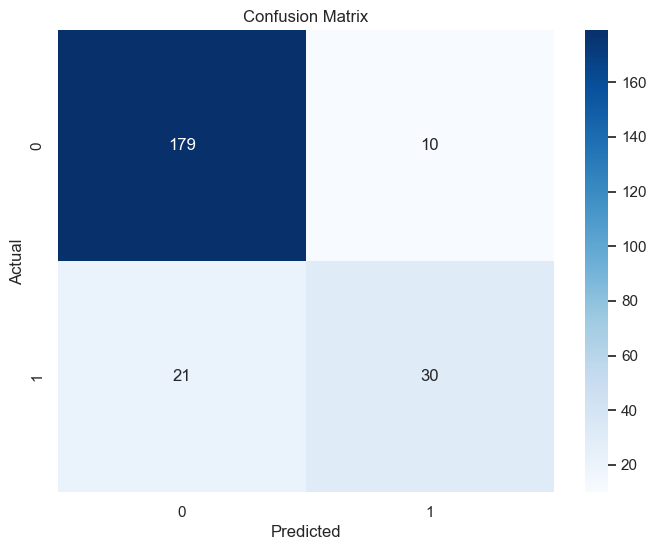

In [253]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, preds_kn)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

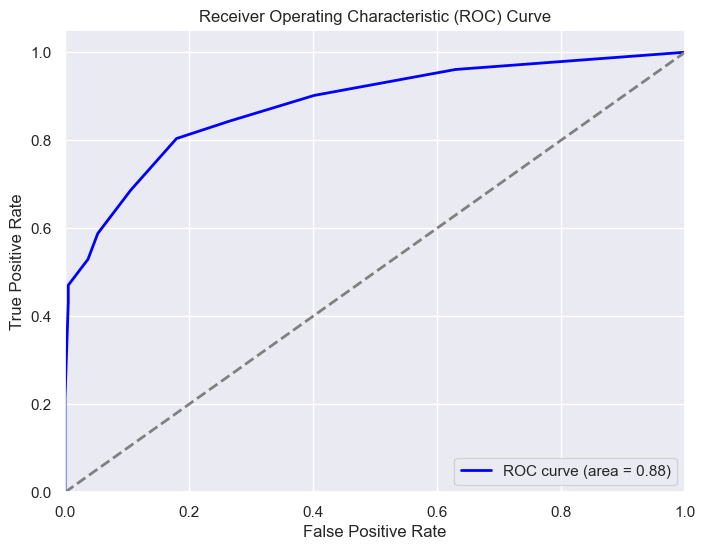

In [255]:
# Compute ROC curve and ROC area
y_proba_kn = best_model.predict_proba(X_test)[:, 1]
fpr_kn, tpr_kn, _ = roc_curve(y_test, y_proba_kn)
roc_auc_kn = auc(fpr_kn, tpr_kn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_kn, tpr_kn, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_kn)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### XGBoost

In [258]:
# !pip install xgboost

In [260]:
from xgboost import XGBClassifier

In [262]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('smote',SMOTE(random_state=42)),('classifier', XGBClassifier())])

In [264]:
param_grid = {
    'classifier__max_depth': [2, 3, 5],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__n_estimators': [100, 200],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}

In [266]:
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [268]:
clf=GridSearchCV(pipeline,param_grid,cv=SKF,n_jobs=5,verbose=1)

In [270]:
model=clf.fit(X_train,y_train)
print(model)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['result']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                   

In [272]:
print(clf.best_params_)

{'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 2, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}


In [274]:
best_model = clf.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ethnicity',
                                                   'jaundice', 'autism',
                                                   'contry_of_res'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_scor...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [276]:
preds_xgb = best_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, preds_xgb))

print("Classification Report:\n", classification_report(y_test, preds_xgb))

Accuracy Score: 0.8375
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       189
           1       0.61      0.65      0.63        51

    accuracy                           0.84       240
   macro avg       0.76      0.77      0.76       240
weighted avg       0.84      0.84      0.84       240



In [278]:
print (r2_score(y_test, preds_xgb))

0.02894491129785215


In [280]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score

In [282]:
# Print precision score
precision = precision_score(y_test, preds_xgb)
print("Precision Score:", precision)

Precision Score: 0.6111111111111112


Confusion Matrix:
 [[168  21]
 [ 18  33]]


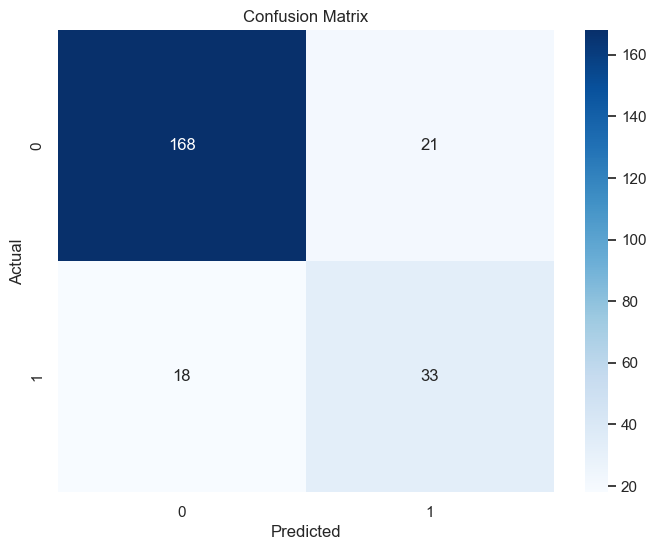

In [284]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, preds_xgb)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

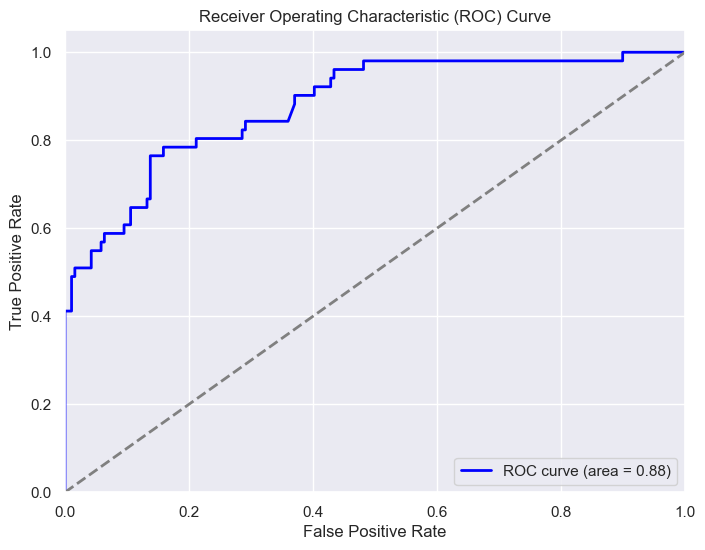

In [286]:
# Compute ROC curve and ROC area
y_proba_xgb = best_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

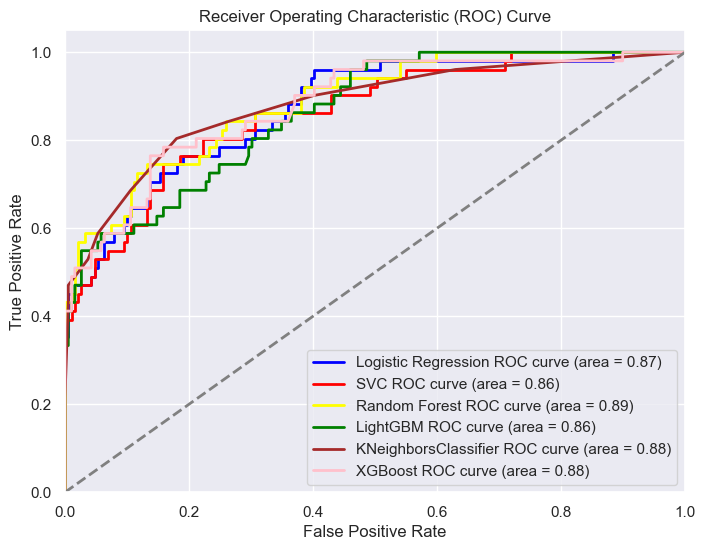

In [288]:
# Plotting both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_lr )
plt.plot(fpr_svc, tpr_svc, color='red', lw=2, label='SVC ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot(fpr_rf, tpr_rf, color='yellow', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lgb, tpr_lgb, color='green', lw=2, label='LightGBM ROC curve (area = %0.2f)' % roc_auc_lgb)
plt.plot(fpr_kn, tpr_kn, color='brown', lw=2, label='KNeighborsClassifier ROC curve (area = %0.2f)' % roc_auc_kn)
plt.plot(fpr_xgb, tpr_xgb, color='pink', lw=2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [290]:
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, r2_score
# Calculate metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, preds_lr)
lr_precision = precision_score(y_test, preds_lr)
lr_r2_score = r2_score(y_test, preds_lr)
lr_roc_auc = roc_auc_score(y_test, y_proba_lr)

# Calculate metrics for SVC
svc_accuracy = accuracy_score(y_test, preds_svc)
svc_precision = precision_score(y_test, preds_svc)
svc_r2_score = r2_score(y_test, preds_svc)
svc_roc_auc = roc_auc_score(y_test, y_proba_svc)

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, preds_rf)
rf_precision = precision_score(y_test, preds_rf)
rf_r2_score = r2_score(y_test, preds_rf)
rf_roc_auc = roc_auc_score(y_test, y_proba_rf)

# Calculate metrics for LightGBM
lgb_accuracy = accuracy_score(y_test, preds_lgb)
lgb_precision = precision_score(y_test, preds_lgb)
lgb_r2_score = r2_score(y_test, preds_lgb)
lgb_roc_auc = roc_auc_score(y_test, y_proba_lgb)

# Calculate metrics for KNeighborsClassifier
kn_accuracy = accuracy_score(y_test, preds_kn)
kn_precision = precision_score(y_test, preds_kn)
kn_r2_score = r2_score(y_test, preds_kn)
kn_roc_auc = roc_auc_score(y_test, y_proba_kn)

# Calculate metrics for XGBoost
xgb_accuracy = accuracy_score(y_test, preds_xgb)
xgb_precision = precision_score(y_test, preds_xgb)
xgb_r2_score = r2_score(y_test, preds_xgb)
xgb_roc_auc = roc_auc_score(y_test, y_proba_xgb)


In [292]:
# Create a data frame to display the metrics
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVC', 'Random Forest', 'LightGBM', 'KNeighborsClassifier', 'XGBoost'],
    'Accuracy': [lr_accuracy, svc_accuracy, rf_accuracy, lgb_accuracy, kn_accuracy, xgb_accuracy],
    'Precision': [lr_precision, svc_precision, rf_precision, lgb_precision, kn_precision, xgb_precision],
    'R2 Score': [lr_r2_score, svc_r2_score, rf_r2_score, lgb_r2_score, kn_r2_score, xgb_r2_score],
    'ROC AUC': [lr_roc_auc, svc_roc_auc,  rf_roc_auc,  lgb_roc_auc,  kn_roc_auc,  xgb_roc_auc]
})

# Display the results
print("Metrics Comparison:")
print(results_df)

Metrics Comparison:
                  Model  Accuracy  Precision  R2 Score   ROC AUC
0   Logistic Regression  0.783333   0.493671 -0.294740  0.873120
1                   SVC  0.800000   0.520000 -0.195145  0.863575
2         Random Forest  0.841667   0.622642  0.053844  0.886710
3              LightGBM  0.800000   0.525424 -0.195145  0.863316
4  KNeighborsClassifier  0.870833   0.750000  0.228136  0.880122
5               XGBoost  0.837500   0.611111  0.028945  0.880693
